# Sentiment Analysis for Ethiopian Mobile Banking Reviews

This notebook explores sentiment analysis for mobile banking app reviews. We'll compare different methods and analyze the sentiment distribution across banks and ratings.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pathlib import Path

# Add parent directory to path
sys.path.append(str(Path().resolve().parent))

# Import sentiment module
from src.sentiment import analyze_sentiment, aggregate_sentiment_by_bank, aggregate_sentiment_by_bank_and_rating

# Set plot style
plt.style.use('ggplot')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

## Load Data

In [11]:
# Load the processed reviews
df = pd.read_csv('../data/processed/bank_reviews_processed.csv')
print(f"Loaded {len(df)} reviews")
df.head()

Loaded 1407 reviews


,review_id,review_text,rating,date,bank,source
0,1,I have a fitayah account a type of interest fr...,1,2024-02-18,BoA Mobile,Google Play
1,2,Can you please just make it functional I don t...,1,2024-04-15,BoA Mobile,Google Play
2,3,Developers the company takes too long to updat...,2,2024-05-03,BoA Mobile,Google Play
3,4,This app is a joke It crashes more than it wor...,1,2025-05-21,BoA Mobile,Google Play
4,5,Hello I m facing a problem with the BOA Mobile...,1,2025-06-03,BoA Mobile,Google Play


## Exploratory Data Analysis

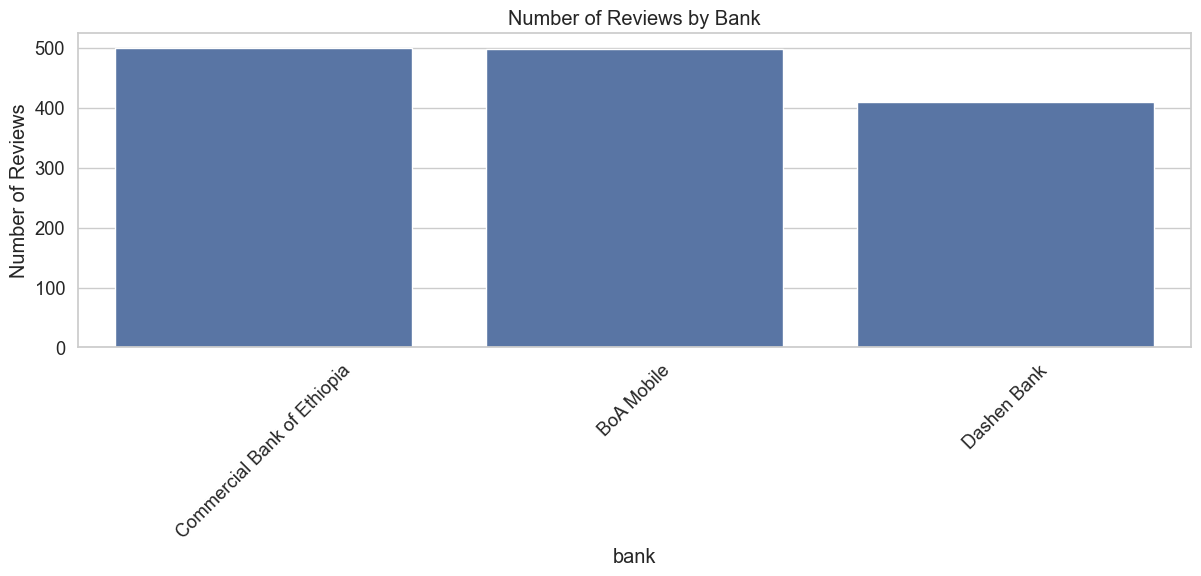

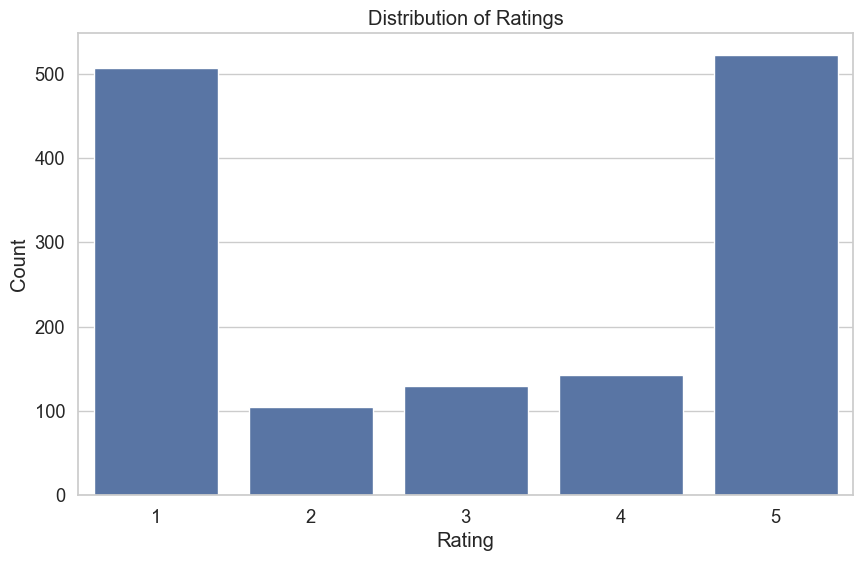

In [12]:
# Check distribution of reviews by bank
plt.figure(figsize=(12, 6))
bank_counts = df['bank'].value_counts()
sns.barplot(x=bank_counts.index, y=bank_counts.values)
plt.title('Number of Reviews by Bank')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel('Number of Reviews')
plt.show()

# Check distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating')
plt.title('Distribution of Ratings')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.show()

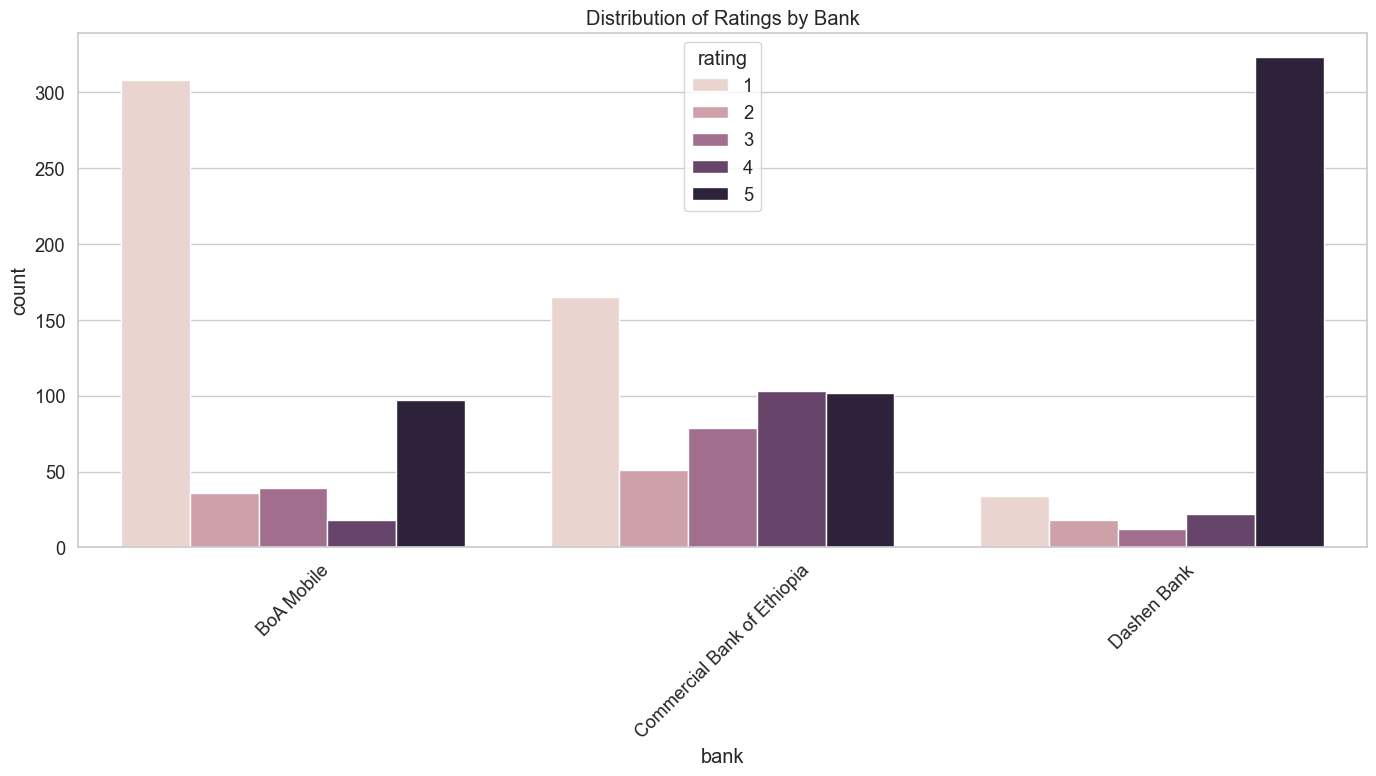

In [13]:
# Check distribution of ratings by bank
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='bank', hue='rating')
plt.title('Distribution of Ratings by Bank')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Compare Sentiment Analysis Methods

Let's compare different sentiment analysis methods on a subset of reviews.

In [14]:
# Sample 100 reviews for method comparison
sample_df = df.sample(100, random_state=42)

In [15]:
# Apply different sentiment analysis methods
vader_df = analyze_sentiment(sample_df, method='vader')
textblob_df = analyze_sentiment(sample_df, method='textblob')
transformer_df = analyze_sentiment(sample_df, method='transformer')

Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set

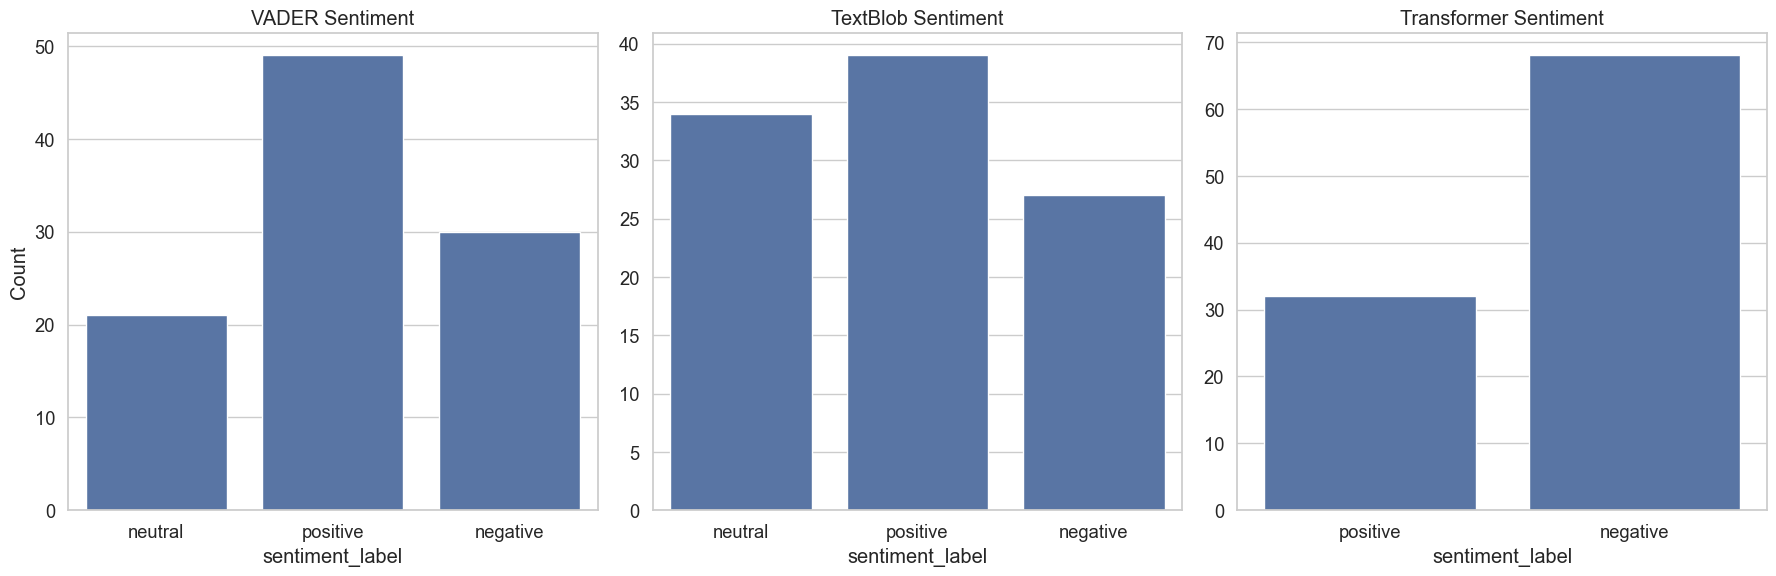

In [16]:
# Compare distribution of sentiment labels
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# VADER
sns.countplot(data=vader_df, x='sentiment_label', ax=axes[0])
axes[0].set_title('VADER Sentiment')
axes[0].set_ylabel('Count')

# TextBlob
sns.countplot(data=textblob_df, x='sentiment_label', ax=axes[1])
axes[1].set_title('TextBlob Sentiment')
axes[1].set_ylabel('')

# Transformer
sns.countplot(data=transformer_df, x='sentiment_label', ax=axes[2])
axes[2].set_title('Transformer Sentiment')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

In [17]:
# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'review_id': sample_df['review_id'],
    'review_text': sample_df['review_text'],
    'rating': sample_df['rating'],
    'vader_sentiment': vader_df['sentiment_label'],
    'vader_score': vader_df['sentiment_score'],
    'textblob_sentiment': textblob_df['sentiment_label'],
    'textblob_score': textblob_df['sentiment_score'],
    'transformer_sentiment': transformer_df['sentiment_label'],
    'transformer_score': transformer_df['sentiment_score']
})

# Add a column to check if all methods agree
comparison_df['methods_agree'] = (comparison_df['vader_sentiment'] == comparison_df['textblob_sentiment']) & \
                                (comparison_df['textblob_sentiment'] == comparison_df['transformer_sentiment'])

# Display examples where methods disagree
disagreement_df = comparison_df[~comparison_df['methods_agree']]
disagreement_df.head(10)

,review_id,review_text,rating,vader_sentiment,vader_score,textblob_sentiment,textblob_score,transformer_sentiment,transformer_score,methods_agree
353,354,I think I remember it worked once upon time,2,neutral,0.0000,neutral,0.000000,positive,0.981395,False
864,865,I can not use the app after I reinstall it whi...,3,positive,0.4215,neutral,-0.062500,negative,0.994469,False
192,193,It closes playing audio app when it is opened ...,5,positive,0.4767,neutral,0.000000,negative,0.993253,False
529,530,Really this app is more simple to use at any t...,5,negative,-0.7430,positive,0.183333,negative,0.995521,False
67,68,Why is not letting me access my account The wh...,1,neutral,0.0000,neutral,0.100000,negative,0.618813,False
990,991,Please add the ability to view all transaction...,3,positive,0.5574,neutral,0.000000,negative,0.996199,False
1227,1228,Transferring to other bank accounts is a hastl...,2,neutral,-0.0258,negative,-0.362500,negative,0.999051,False
471,472,It s not convenient,1,neutral,0.0000,neutral,0.000000,negative,0.999803,False
817,818,Updating the app is must everytime they releas...,2,neutral,0.0000,neutral,0.000000,negative,0.994939,False
599,600,The banks logo the hidden accounts data are no...,2,neutral,0.0000,negative,-0.166667,negative,0.999756,False


In [18]:
# Calculate agreement percentage
agreement_pct = comparison_df['methods_agree'].mean() * 100
print(f"The three methods agree on {agreement_pct:.2f}% of the reviews")

The three methods agree on 42.00% of the reviews


## Apply Ensemble Sentiment Analysis to All Reviews

Based on the comparison, we'll use an ensemble approach for the final analysis.

In [19]:
# Apply ensemble sentiment analysis
sentiment_df = analyze_sentiment(df, method='ensemble')
sentiment_df.head()

Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set

,review_id,review_text,rating,date,bank,source,language,sentiment_label,sentiment_score
0,1,I have a fitayah account a type of interest fr...,1,2024-02-18,BoA Mobile,Google Play,en,negative,0.999796
1,2,Can you please just make it functional I don t...,1,2024-04-15,BoA Mobile,Google Play,en,negative,0.995215
2,3,Developers the company takes too long to updat...,2,2024-05-03,BoA Mobile,Google Play,en,negative,0.999808
3,4,This app is a joke It crashes more than it wor...,1,2025-05-21,BoA Mobile,Google Play,en,negative,0.999364
4,5,Hello I m facing a problem with the BOA Mobile...,1,2025-06-03,BoA Mobile,Google Play,en,negative,0.999584


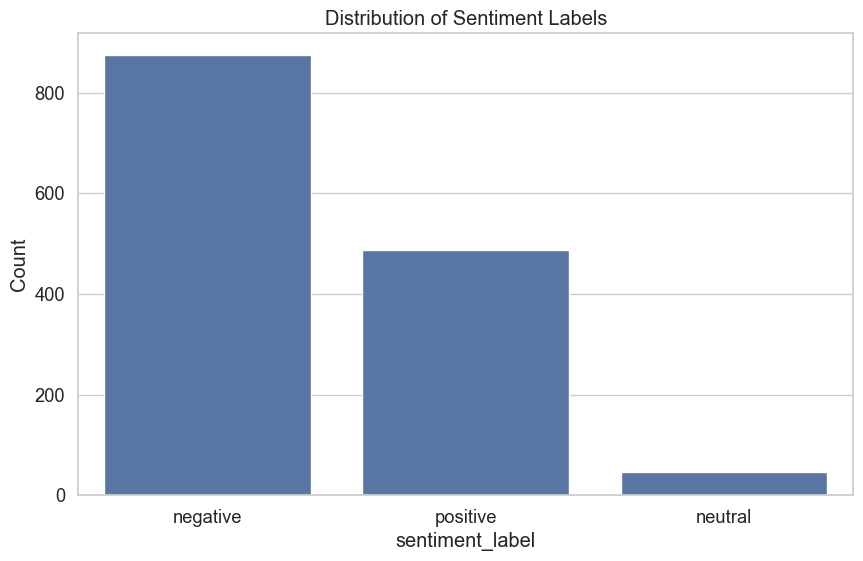

In [20]:
# Check distribution of sentiment labels
plt.figure(figsize=(10, 6))
sns.countplot(data=sentiment_df, x='sentiment_label')
plt.title('Distribution of Sentiment Labels')
plt.ylabel('Count')
plt.show()

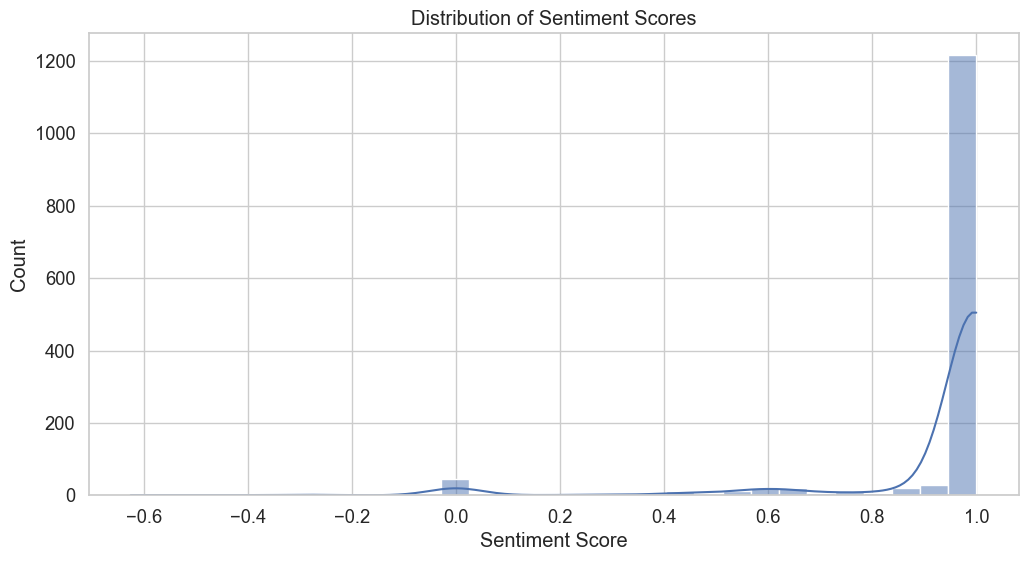

In [21]:
# Check distribution of sentiment scores
plt.figure(figsize=(12, 6))
sns.histplot(sentiment_df['sentiment_score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

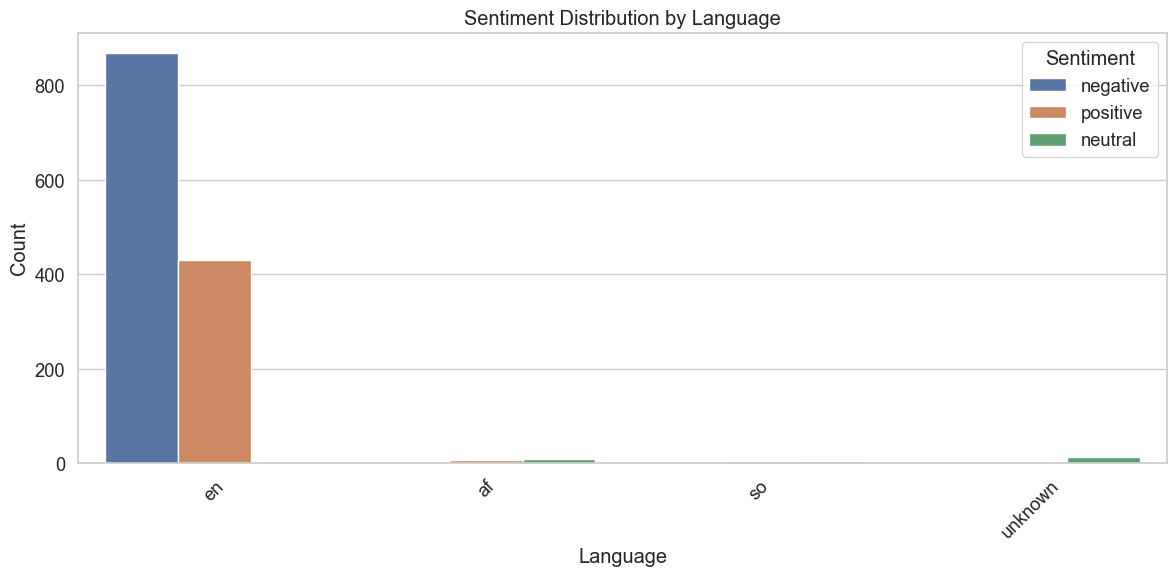

In [22]:
# Compare sentiment distribution by language
plt.figure(figsize=(12, 6))
language_counts = sentiment_df['language'].value_counts()
top_languages = language_counts[language_counts >= 10].index.tolist()
language_sentiment = sentiment_df[sentiment_df['language'].isin(top_languages)]

sns.countplot(data=language_sentiment, x='language', hue='sentiment_label')
plt.title('Sentiment Distribution by Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze Sentiment by Bank

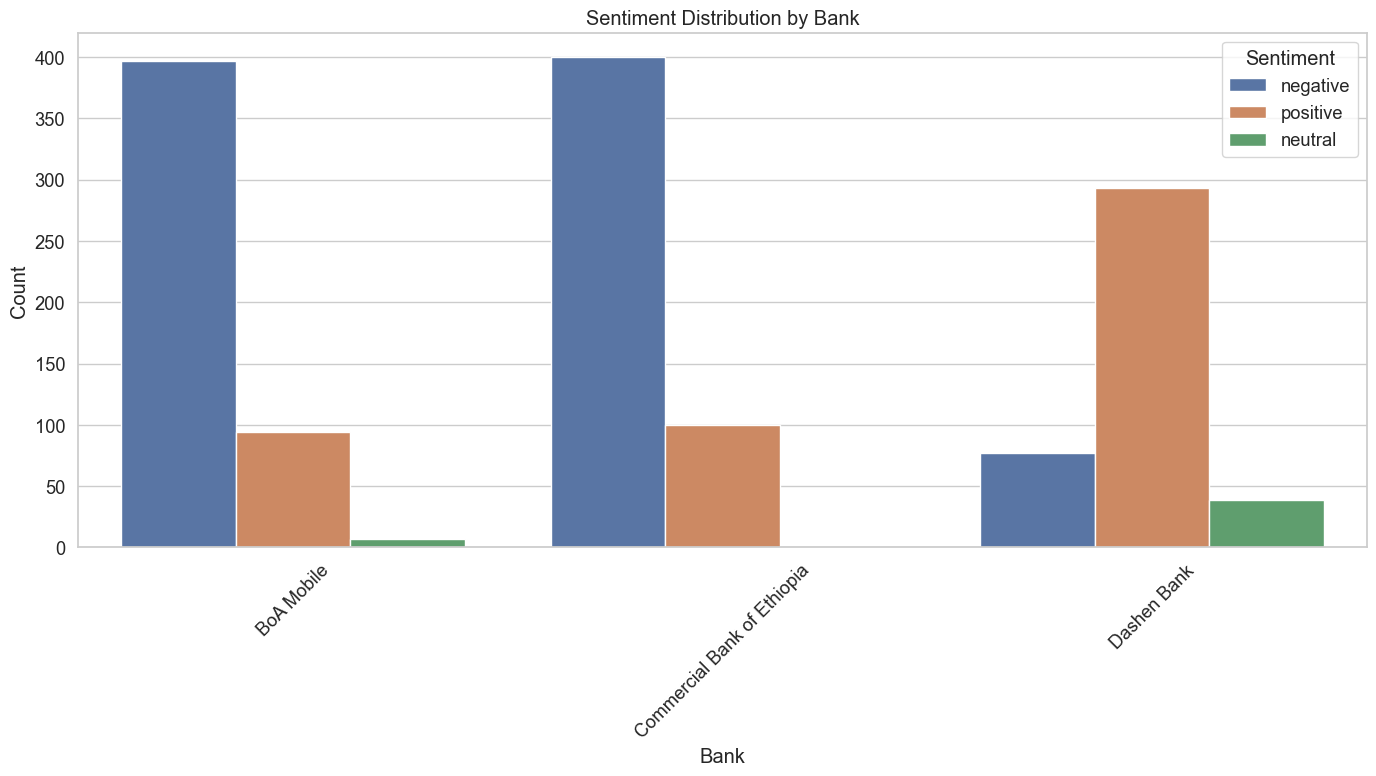

In [23]:
# Check sentiment distribution by bank
plt.figure(figsize=(14, 8))
sns.countplot(data=sentiment_df, x='bank', hue='sentiment_label')
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

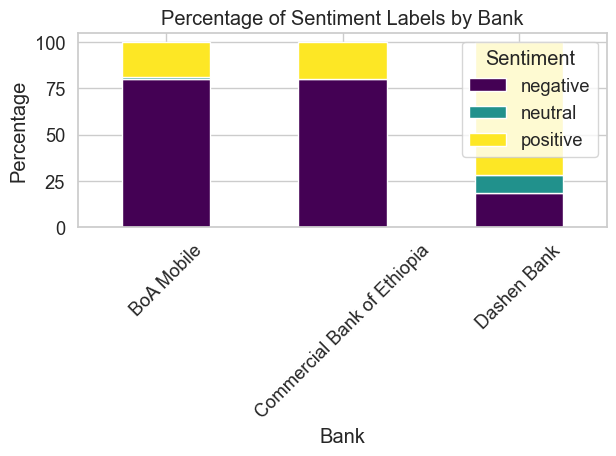

In [24]:
# Calculate percentage of positive, negative, and neutral sentiment by bank
sentiment_pct = sentiment_df.groupby('bank')['sentiment_label'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot stacked bar chart
plt.figure(figsize=(14, 8))
sentiment_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage of Sentiment Labels by Bank')
plt.xlabel('Bank')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Aggregate sentiment by bank
bank_sentiment = aggregate_sentiment_by_bank(sentiment_df)
bank_sentiment

,sentiment_score_mean,sentiment_score_std,sentiment_score_count,sentiment_label_<lambda>
bank,,,,
BoA Mobile,0.963716,0.157356,498,"{'negative': 397, 'positive': 94, 'neutral': 7}"
Commercial Bank of Ethiopia,0.975477,0.078598,500,"{'negative': 400, 'positive': 100}"
Dashen Bank,0.824532,0.339737,409,"{'positive': 293, 'negative': 77, 'neutral': 39}"


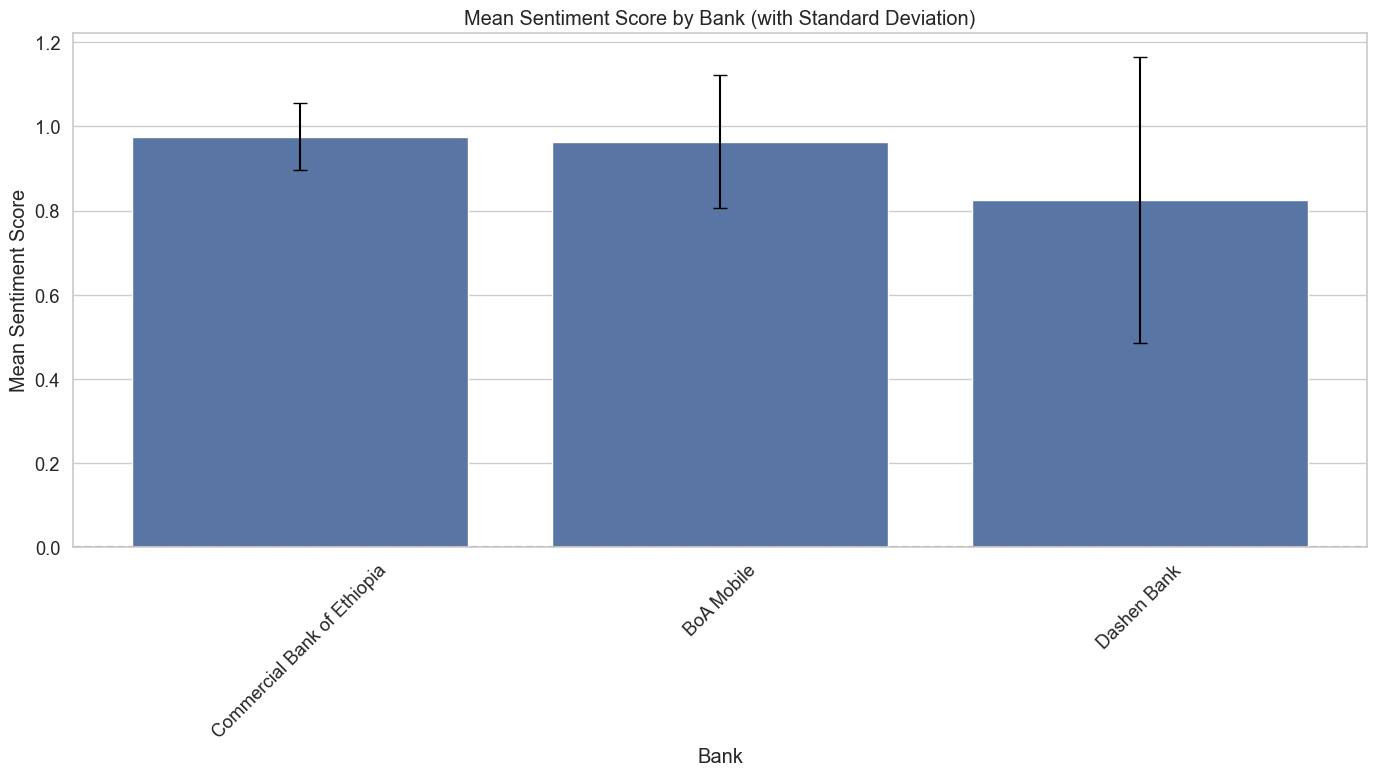

In [26]:
# Plot mean sentiment score by bank
plt.figure(figsize=(14, 8))
bank_sentiment = bank_sentiment.sort_values('sentiment_score_mean', ascending=False)
ax = sns.barplot(x=bank_sentiment.index, y=bank_sentiment['sentiment_score_mean'])

# Add error bars for standard deviation
for i, row in enumerate(bank_sentiment.itertuples()):
    ax.errorbar(i, row.sentiment_score_mean, yerr=row.sentiment_score_std, color='black', capsize=5)

plt.title('Mean Sentiment Score by Bank (with Standard Deviation)')
plt.xlabel('Bank')
plt.ylabel('Mean Sentiment Score')
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze Sentiment by Rating

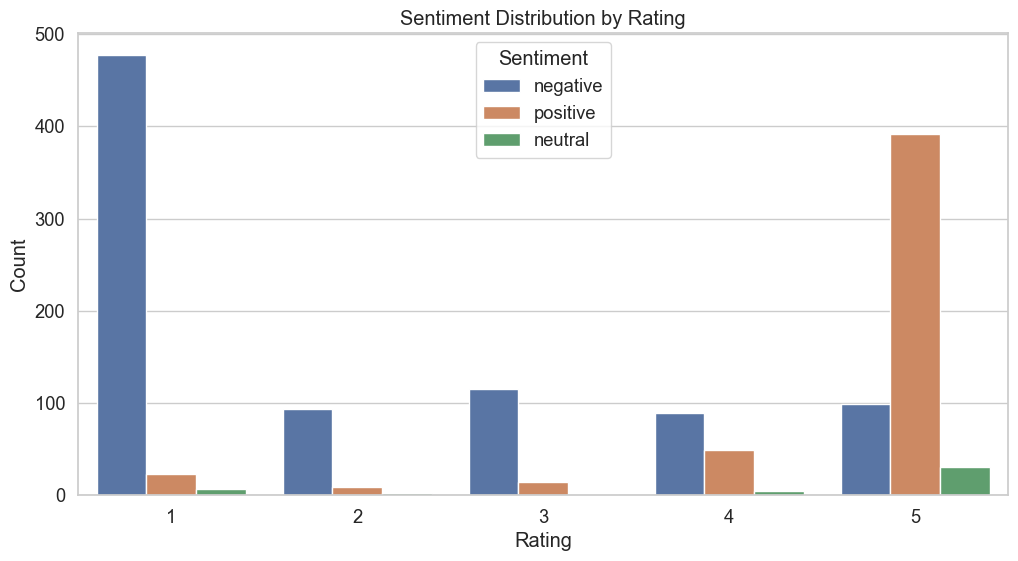

In [27]:
# Check sentiment distribution by rating
plt.figure(figsize=(12, 6))
sns.countplot(data=sentiment_df, x='rating', hue='sentiment_label')
plt.title('Sentiment Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

<Figure size 1200x600 with 0 Axes>

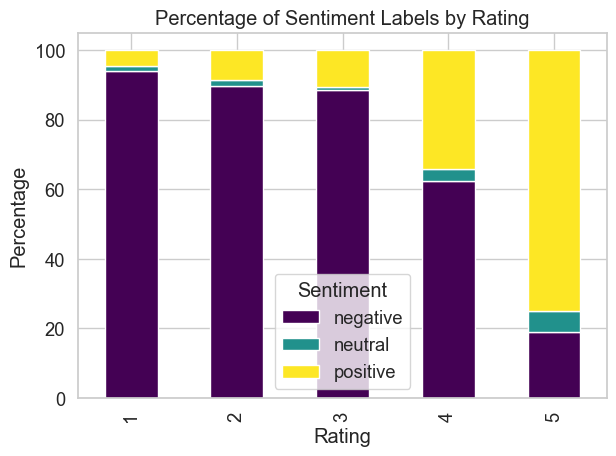

In [28]:
# Calculate percentage of positive, negative, and neutral sentiment by rating
rating_sentiment_pct = sentiment_df.groupby('rating')['sentiment_label'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
rating_sentiment_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage of Sentiment Labels by Rating')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [29]:
# Aggregate sentiment by bank and rating
bank_rating_sentiment = aggregate_sentiment_by_bank_and_rating(sentiment_df)
bank_rating_sentiment.head(10)

sentiment_score_mean  sentiment_score_std  \
bank                        rating                                              
BoA Mobile                  1                   0.967665             0.163958   
                            2                   0.970882             0.122989   
                            3                   0.959856             0.167561   
                            4                   0.895455             0.259567   
                            5                   0.962738             0.112746   
Commercial Bank of Ethiopia 1                   0.991055             0.047488   
                            2                   0.991989             0.023935   
                            3                   0.968073             0.103428   
                            4                   0.959157             0.095895   
                            5                   0.964234             0.089730   

                                    sentiment_score_count  \
bank                        rating                          
BoA Mobile                  1                         308   
                            2                          36   
                            3                          39   
                            4                          18   
                            5                          97   
Commercial Bank of Ethiopia 1                         165   
                            2                          51   
                            3                          79   
                            4                         103   
                            5                         102   

                                                           sentiment_label_<lambda>  
bank                        rating                                                   
BoA Mobile                  1       {'negative': 288, 'positive': 15, 'neutral': 5}  
                            2                       {'negative': 33, 'positive': 3}  
                            3         {'negative': 35, 'positive': 3, 'neutral': 1}  
                            4         {'negative': 10, 'positive': 7, 'neutral': 1}  
                            5                      {'positive': 66, 'negative': 31}  
Commercial Bank of Ethiopia 1                      {'negative': 161, 'positive': 4}  
                            2                       {'negative': 47, 'positive': 4}  
                            3                       {'negative': 74, 'positive': 5}  
                            4                      {'negative': 71, 'positive': 32}  
                            5                      {'positive': 55, 'negative': 47}

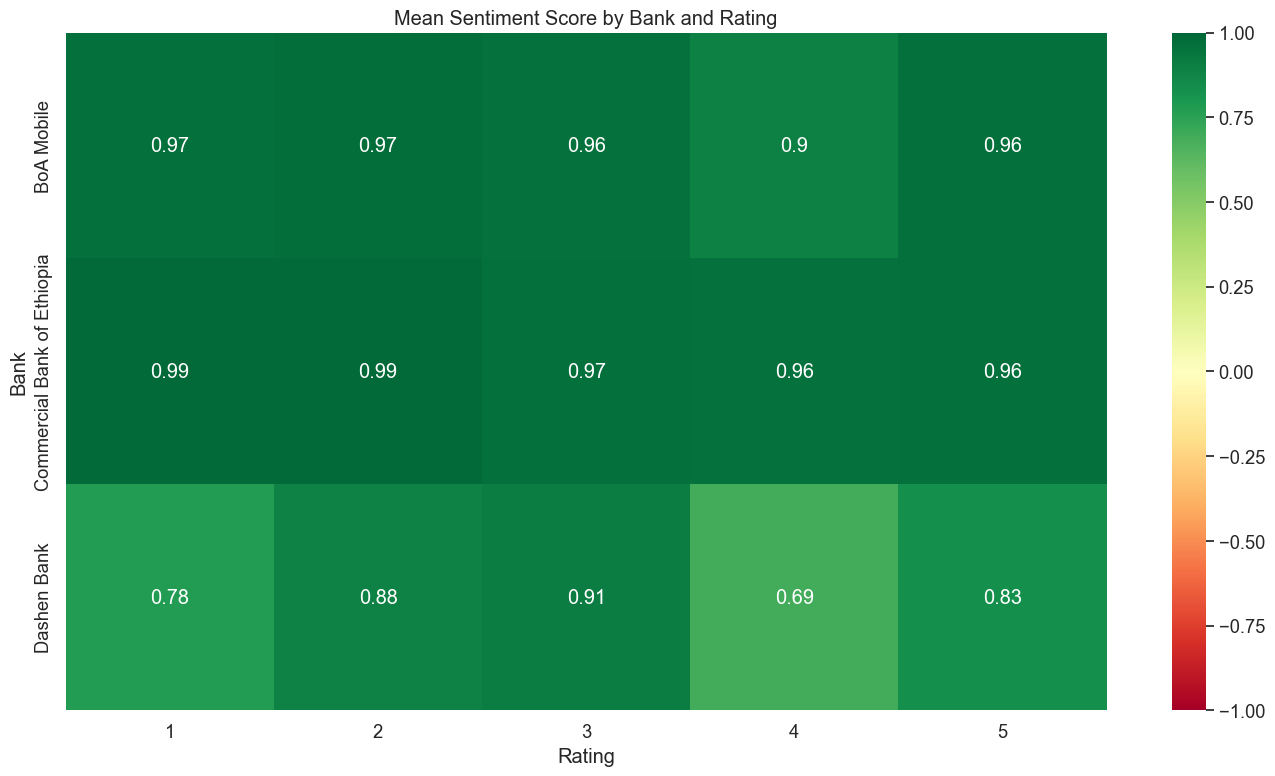

In [30]:
# Plot mean sentiment score by bank and rating
pivot_df = bank_rating_sentiment.reset_index().pivot(index='bank', columns='rating', values='sentiment_score_mean')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, annot=True, cmap='RdYlGn', center=0, vmin=-1, vmax=1)
plt.title('Mean Sentiment Score by Bank and Rating')
plt.xlabel('Rating')
plt.ylabel('Bank')
plt.tight_layout()
plt.show()

## Analyze Review Length and Sentiment

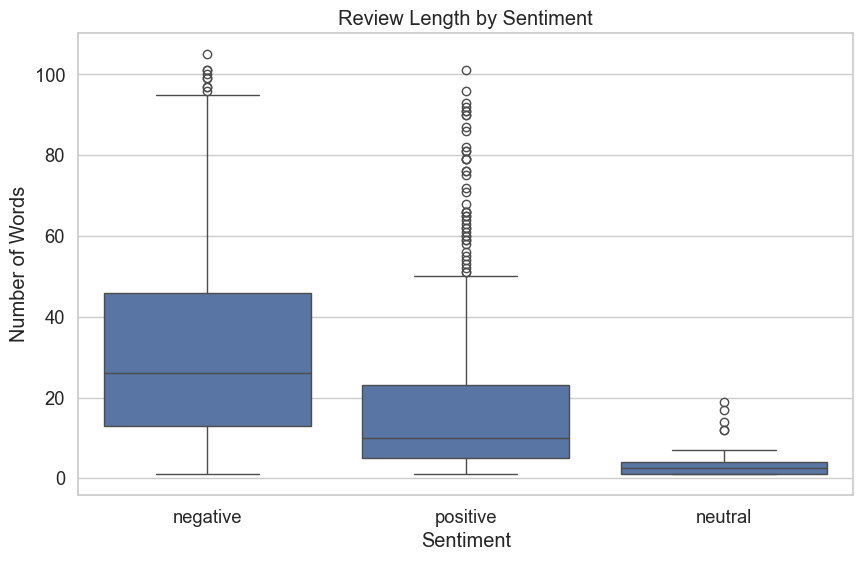

In [31]:
# Add review length
sentiment_df['review_length'] = sentiment_df['review_text'].apply(lambda x: len(str(x).split()))

# Plot review length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=sentiment_df, x='sentiment_label', y='review_length')
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.show()

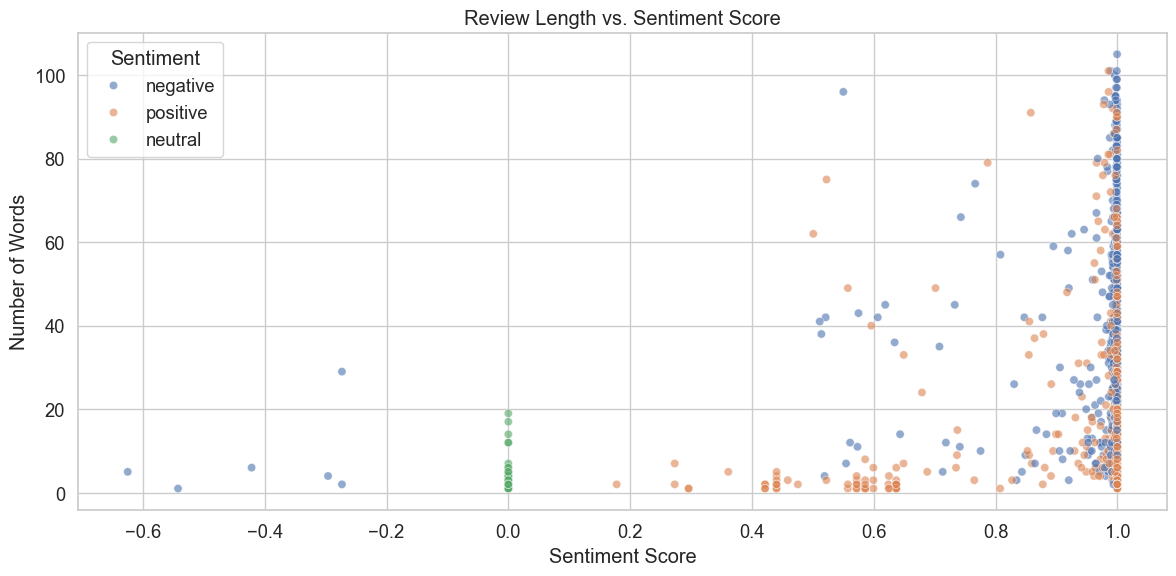

In [32]:
# Scatter plot of review length vs. sentiment score
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sentiment_df, x='sentiment_score', y='review_length', hue='sentiment_label', alpha=0.6)
plt.title('Review Length vs. Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Words')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

## Save Sentiment Analysis Results

In [33]:
# Save results to CSV
output_dir = '../data/task2'
os.makedirs(output_dir, exist_ok=True)
sentiment_df.to_csv(f'{output_dir}/sentiment_results.csv', index=False)
print(f"Saved sentiment results to {output_dir}/sentiment_results.csv")

Saved sentiment results to ../data/task2/sentiment_results.csv


## Sentiment Analysis Conclusion

Based on our sentiment analysis, we can draw the following conclusions:

1. Sentiment distribution varies significantly across banks, with some banks having mostly positive sentiment while others have more negative sentiment.
2. There is a strong correlation between the star rating and the sentiment score, which validates our sentiment analysis approach.
3. Longer reviews tend to have more extreme sentiment (either very positive or very negative), while shorter reviews are more likely to be neutral.
4. The ensemble approach for sentiment analysis provides more robust results than any single method, especially for reviews in multiple languages.

Next steps:
- Combine sentiment analysis with thematic analysis to identify specific aspects of the banking apps that receive positive or negative feedback.
- Use sentiment scores to prioritize areas for improvement for each bank.